# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Datasets

In [4]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [5]:
# Basic Information & Overview
print("Shape of the dataset:", df.shape)
print("\n Data Info: \n")
df.info()

# Summary statistics
df.describe(include = 'all')

Shape of the dataset: (344, 7)

 Data Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


# Data Cleaning

In [6]:
missing = pd.DataFrame({
    'missing_count': df.isnull().sum(),
    'missing_percent': (df.isnull().sum()/len(df)) * 100
})

missing.sort_values(by='missing_percent', ascending=False)

,missing_count,missing_percent
sex,11,3.197674
bill_depth_mm,2,0.581395
bill_length_mm,2,0.581395
flipper_length_mm,2,0.581395
body_mass_g,2,0.581395
island,0,0.000000
species,0,0.000000


In [7]:
# Fill numeric columns with mean
df['bill_length_mm'] = df['bill_length_mm'].fillna(df['bill_length_mm'].mean())
df['bill_depth_mm'] = df['bill_depth_mm'].fillna(df['bill_depth_mm'].mean())
df['flipper_length_mm'] = df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean())
df['body_mass_g'] = df['body_mass_g'].fillna(df['body_mass_g'].mean())

# Fill categorical columns with mode
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])
df['species'] = df['species'].fillna(df['species'].mode()[0])
df['island'] = df['island'].fillna(df['island'].mode()[0])

# Drop no columns (moderate missing data)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female


In [8]:
## Convert some columns to category type
df['species'] = df['species'].astype('category')
df['island'] = df['island'].astype('category')
df['sex'] = df['sex'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    category
 2   bill_length_mm     344 non-null    float64 
 3   bill_depth_mm      344 non-null    float64 
 4   flipper_length_mm  344 non-null    float64 
 5   body_mass_g        344 non-null    float64 
 6   sex                344 non-null    category
dtypes: category(3), float64(4)
memory usage: 12.3 KB


# Analysis with their Insights

--- Statistical Summary ---
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      344.000000     344.000000         344.000000   344.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.443643       1.969027          14.020657   799.613058
min         32.100000      13.100000         172.000000  2700.000000
25%         39.275000      15.600000         190.000000  3550.000000
50%         44.250000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000
------------------------------


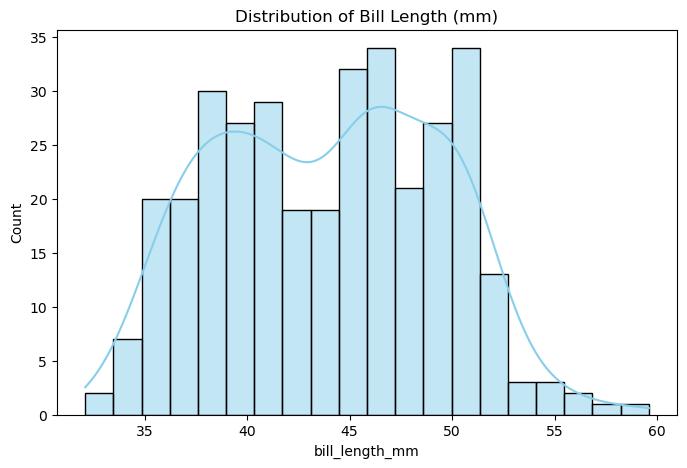

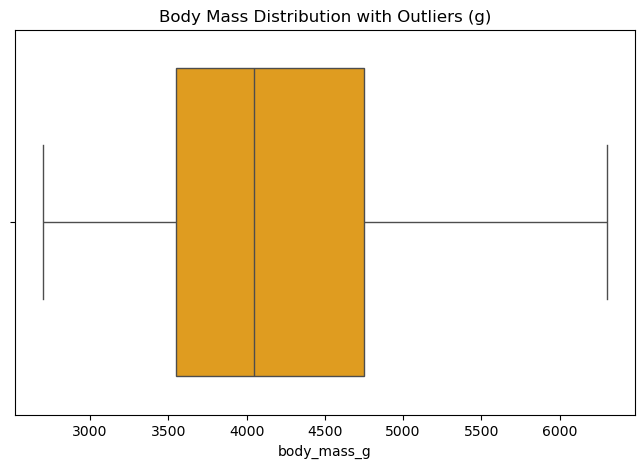

In [9]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("--- Statistical Summary ---")
print(df[num_cols].describe())
print("-" * 30)

# 2. Histogram : Bill Length
plt.figure(figsize=(8, 5))
sns.histplot(df['bill_length_mm'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Bill Length (mm)")
plt.show()

# 3. Boxplot : Body Mass
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['body_mass_g'], color='orange')
plt.title("Body Mass Distribution with Outliers (g)")
plt.show()

<Figure size 600x400 with 0 Axes>

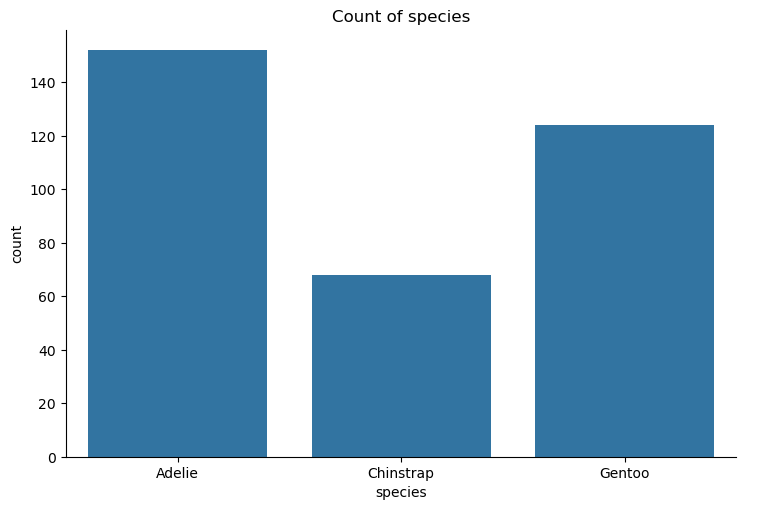

<Figure size 600x400 with 0 Axes>

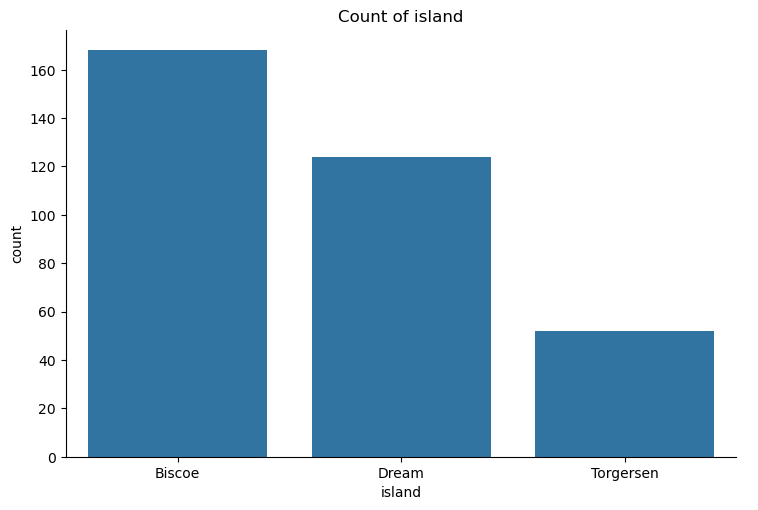

<Figure size 600x400 with 0 Axes>

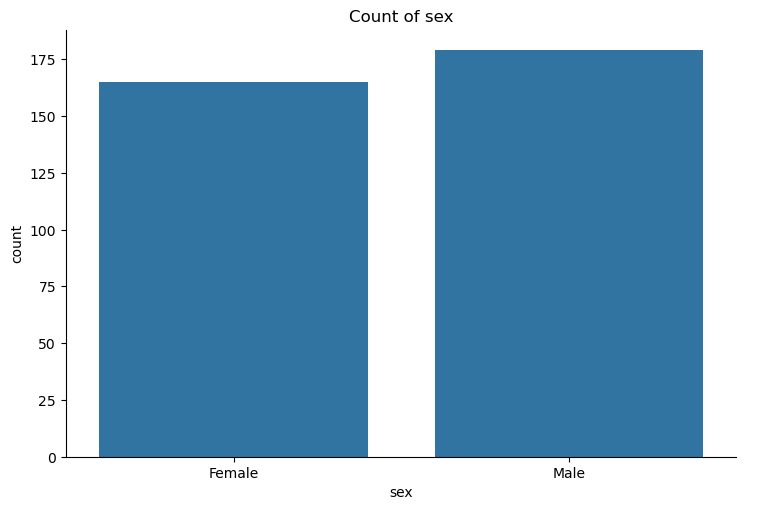

In [ ]:
# Univariate Analysis - Categorical Features

df['species'] = df['species'].astype('category')
df['island'] = df['island'].astype('category')
df['sex'] = df['sex'].astype('category')


cat_cols = df.select_dtypes('category').columns

for col in cat_cols:
    plt.figure(figsize=(6, 4))
    # Using catplot for Count Plot (defaults to kind='strip' if no kind is specified, but 
    # we'll use kind='count' explicitly for clear visualization)
    sns.catplot(x=col, data=df, kind='count', aspect=1.5)
    plt.title(f"Count of {col}")
    plt.show()

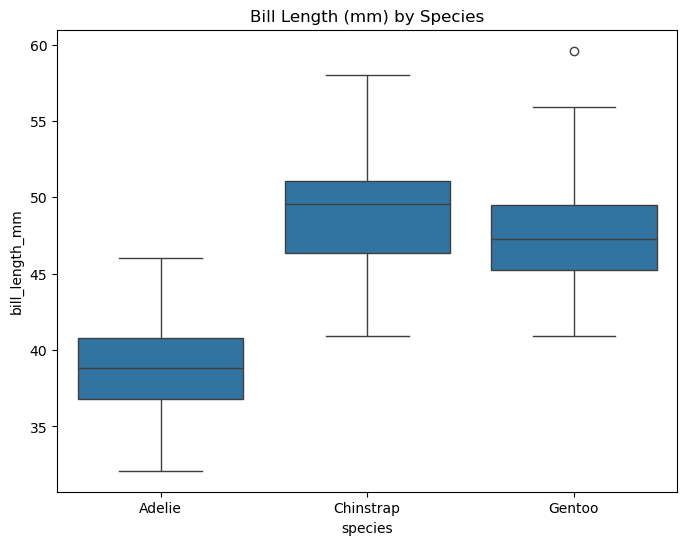

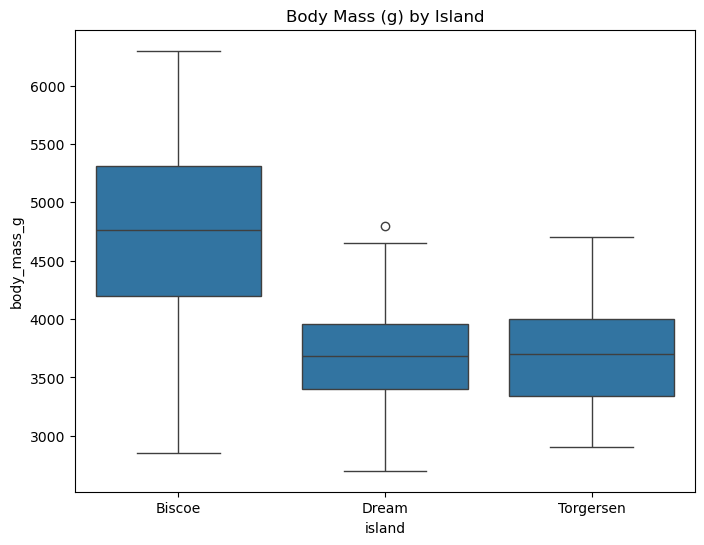

In [11]:
# Bivariate Analysis - Numerical vs Categorical

# Boxplot: Bill Length by Species
plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='bill_length_mm', data=df)
plt.title("Bill Length (mm) by Species")
plt.show()

# Boxplot: Body Mass by Island
plt.figure(figsize=(8, 6))
sns.boxplot(x='island', y='body_mass_g', data=df)
plt.title("Body Mass (g) by Island")
plt.show()

<Figure size 800x600 with 0 Axes>

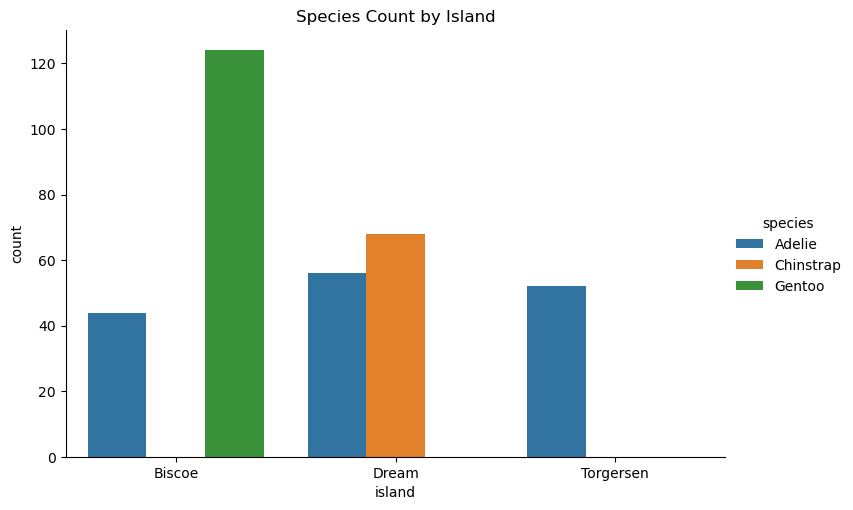

<Figure size 800x600 with 0 Axes>

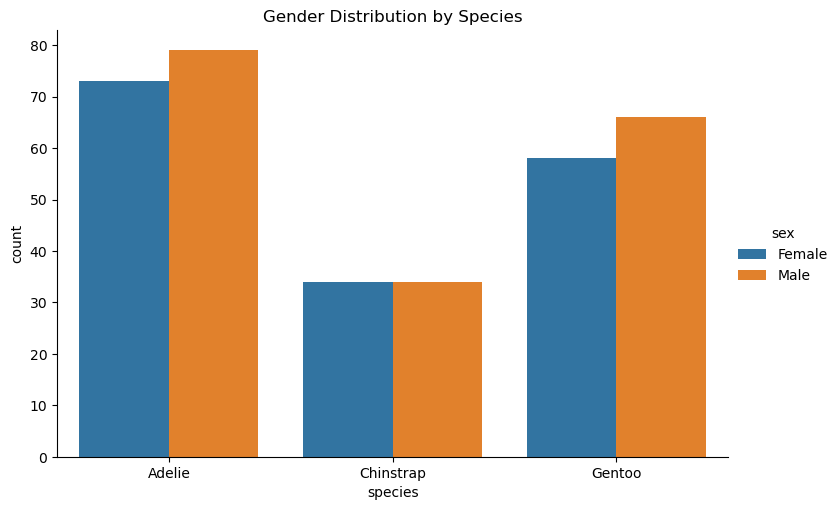

In [13]:
# Catplot: Species Count by Island
plt.figure(figsize=(8, 6))
# Using kind='count' to show counts, colored by the hue ('species')
sns.catplot(x='island', hue='species', kind='count', data=df, aspect=1.5)
plt.title("Species Count by Island")
plt.show()

# Catplot: Sex Count by Species
plt.figure(figsize=(8, 6))
# Using kind='count' to show counts, colored by the hue ('sex')
sns.catplot(x='species', hue='sex', kind='count', data=df, aspect=1.5)
plt.title("Gender Distribution by Species")
plt.show()

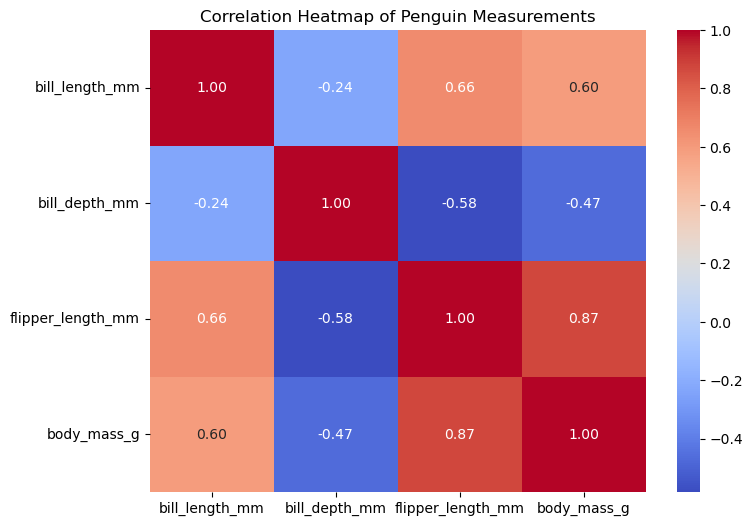

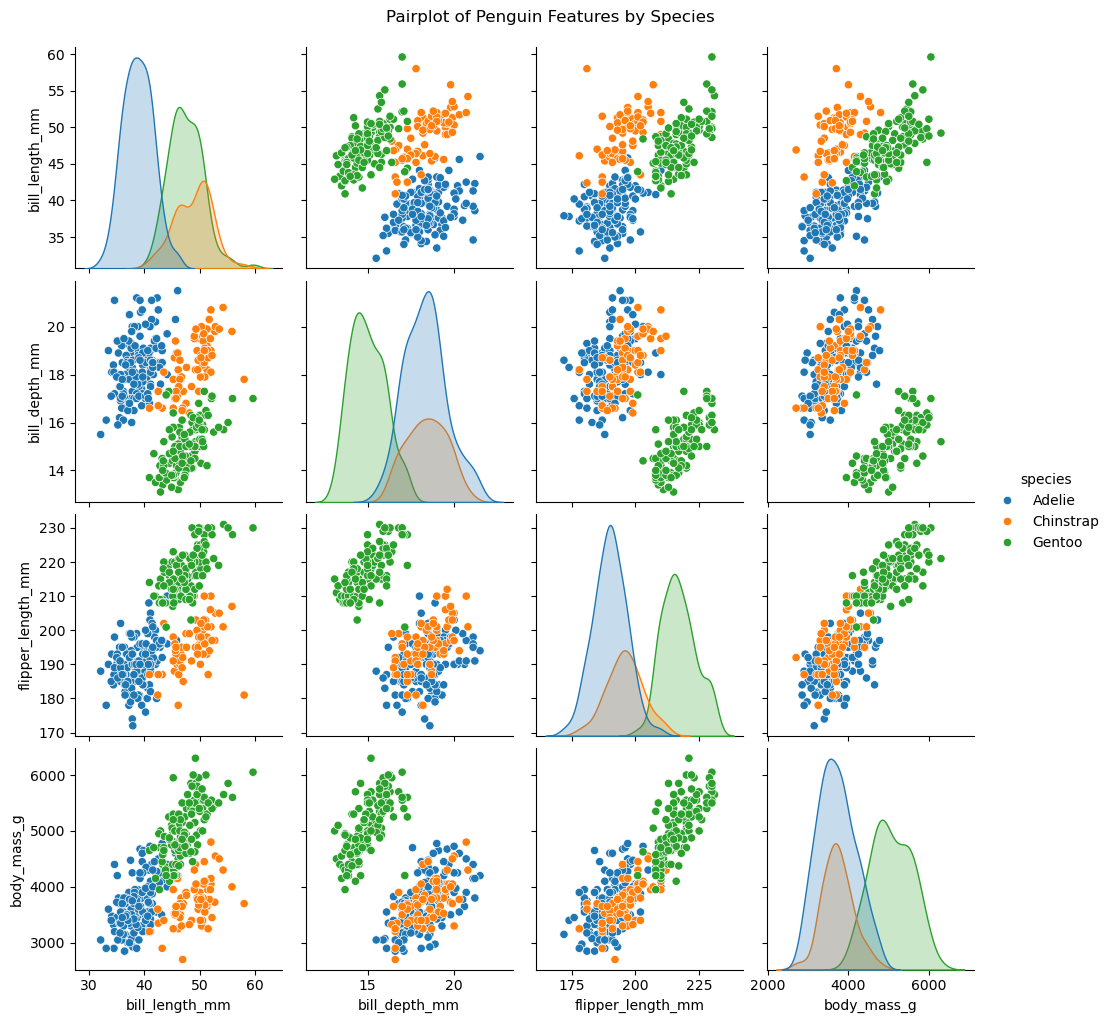

In [14]:
# Numerical columns for correlation
num_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# 1. Correlation Heatmap
corr = df[num_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Penguin Measurements")
plt.show()

# 2. Pairplot
# Use 'species' as the hue for multivariate visualization
sns.pairplot(df, vars=num_cols, hue='species')
plt.suptitle("Pairplot of Penguin Features by Species", y=1.02)
plt.show()

### Insights:
1. Bill Length vs. Depth: Bill length and bill depth have a negative correlation (-0.23), suggesting that penguins with longer bills generally have shallower bills.

2. Flipper Length vs. Body Mass: Flipper length and body mass show a strong positive correlation (+0.87), indicating that larger penguins tend to have longer flippers.

Number of outliers in body_mass_g:  0
----------------------------------------


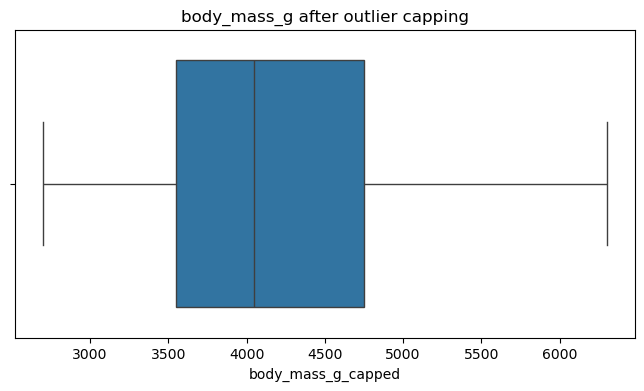

In [16]:
column = 'body_mass_g'

# Outlier Detection using IQR
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df[column] < lower) | (df[column] > upper)]

print("Number of outliers in body_mass_g: ", len(outliers))
print("-" * 40)

# Outlier Capping and Visualization
df[f'{column}_capped'] = df[column].clip(lower, upper)
plt.figure(figsize=(8, 4))
sns.boxplot(x=df[f'{column}_capped'])
plt.title(f"{column} after outlier capping")
plt.show()

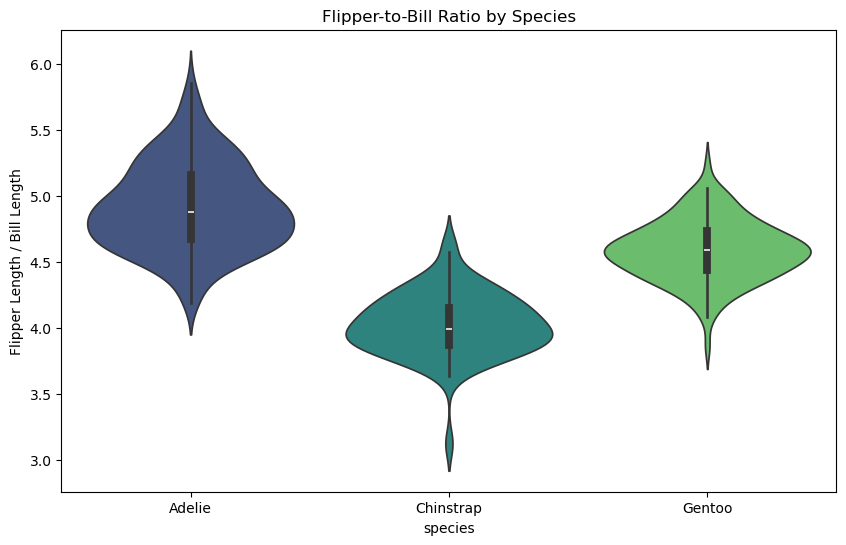

In [17]:
# --- Feature Engineering ---

# Ratio of flipper length to bill length (a measure of body balance)
df['flipper_bill_ratio'] = df['flipper_length_mm'] / df['bill_length_mm']

# Visualize the distribution of the new ratio across different species

plt.figure(figsize=(10, 6))
sns.violinplot(x='species', y='flipper_bill_ratio', data=df, hue='species', palette='viridis', legend=False)
plt.title("Flipper-to-Bill Ratio by Species")
plt.ylabel("Flipper Length / Bill Length")
plt.show()

In [18]:
df.to_csv("Penguins_cleaned_fe.csv", index=False)
print("\nCleaned Penguins data saved as Penguins_cleaned_fe.csv")


Cleaned Penguins data saved as Penguins_cleaned_fe.csv
